First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Dataset shape: (150, 5)

Target classes: ['setosa' 'versicolor' 'virginica']

Class Distribution:
 target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


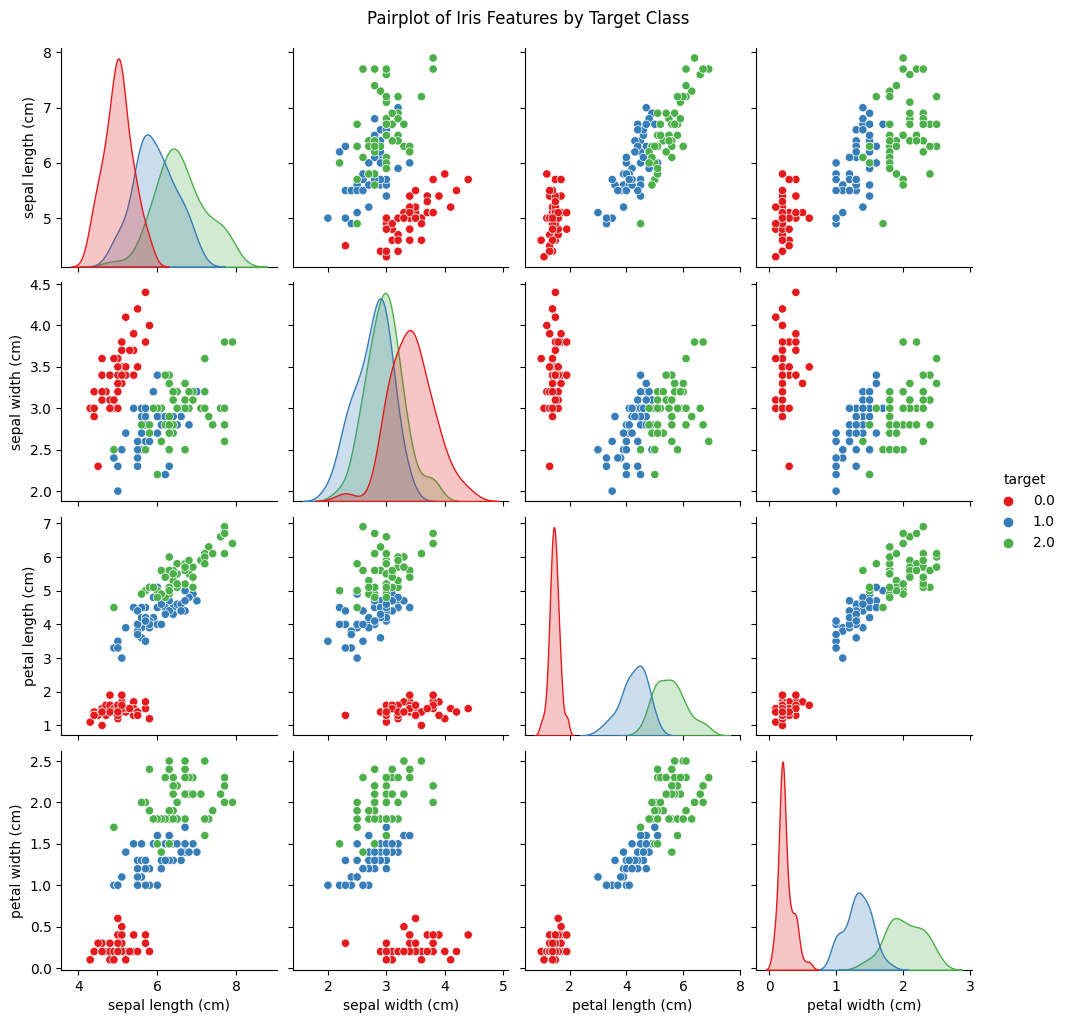

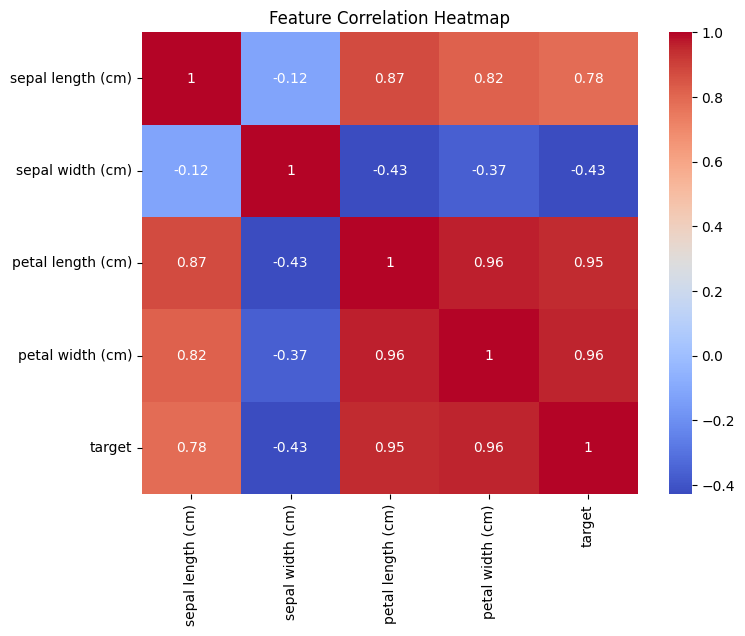


Model Accuracy: 1.00


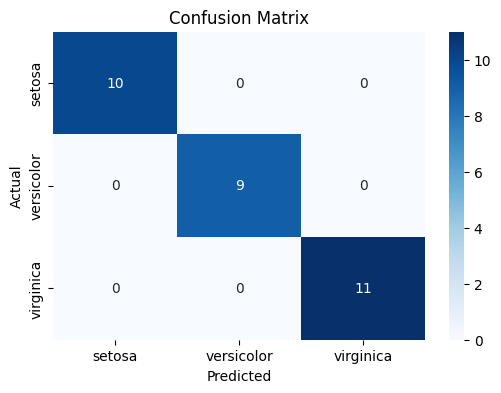


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Conclusion:
The Logistic Regression model has been successfully trained and evaluated on the Iris dataset.
Accuracy achieved is approximately 100.00%. This model can classify Iris flowers into Setosa, Versicolor, and Virginica based on input features.


In [1]:
import warnings
warnings.filterwarnings("ignore")
# Iris Flower Classification Project
# ----------------------------------

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Iris Dataset
iris = load_iris()

# Features (X) and Target (y)
X = iris.data
y = iris.target

# Convert to Pandas DataFrame for better readability
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# 3. Explore the Dataset
print("First 5 rows of the dataset:\n", iris_df.head())
print("\nDataset shape:", iris_df.shape)
print("\nTarget classes:", iris.target_names)
print("\nClass Distribution:\n", iris_df['target'].value_counts())

# 4. Visualize the Dataset
sns.pairplot(iris_df, hue='target', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features by Target Class", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Prepare Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Model Training - Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 8. Model Prediction
y_pred = model.predict(X_test)

# 9. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 10. Conclusion
print("Conclusion:")
print("The Logistic Regression model has been successfully trained and evaluated on the Iris dataset.")
print("Accuracy achieved is approximately {:.2f}%. This model can classify Iris flowers into Setosa, Versicolor, and Virginica based on input features.".format(accuracy * 100))
